# Walmart Sales Forecasting Using FbProphet

### 1. Import Necessary Libraries

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Read the Dataset

In [2]:
df=pd.read_csv('Walmart_Sales.csv')

In [3]:
df.head()

,Date,Weekly_Sales
0,2/5/2010,1643690.90
1,2/12/2010,1641957.44
2,2/19/2010,1611968.17
3,2/26/2010,1409727.59
4,3/5/2010,1554806.68


In [4]:
df.tail()

,Date,Weekly_Sales
6430,9/28/2012,713173.95
6431,10/5/2012,733455.07
6432,10/12/2012,734464.36
6433,10/19/2012,718125.53
6434,10/26/2012,760281.43


<Axes: >

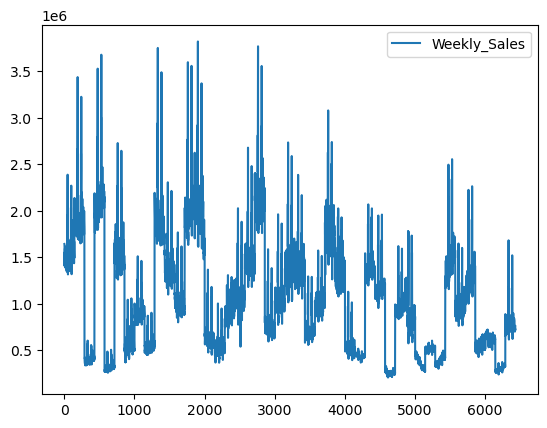

In [5]:
df.plot()

### 3. Data Pre Processing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6435 non-null   object 
 1   Weekly_Sales  6435 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.7+ KB


In [7]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2/5/2010,1643690.90
1,2/12/2010,1641957.44
2,2/19/2010,1611968.17
3,2/26/2010,1409727.59
4,3/5/2010,1554806.68


In [8]:
df.tail()

,ds,y
6430,9/28/2012,713173.95
6431,10/5/2012,733455.07
6432,10/12/2012,734464.36
6433,10/19/2012,718125.53
6434,10/26/2012,760281.43


In [9]:
df['ds'] = pd.to_datetime(df['ds'])

In [10]:
df.head()

,ds,y
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


In [11]:
df.shape

(6435, 2)

### 5. Initialize Model

In [12]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [13]:
# Initialize the Model
model=Prophet()

In [14]:
df.columns

Index(['ds', 'y'], dtype='object')

In [15]:
#fit the model
model.fit(df)

17:01:54 - cmdstanpy - INFO - Chain [1] start processing
17:01:55 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [17]:
df.tail()

,ds,y
6430,2012-09-28,713173.95
6431,2012-10-05,733455.07
6432,2012-10-12,734464.36
6433,2012-10-19,718125.53
6434,2012-10-26,760281.43


### 6. Initializing Prediction Date

In [18]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [19]:
future_dates.tail()

,ds
503,2013-10-22
504,2013-10-23
505,2013-10-24
506,2013-10-25
507,2013-10-26


In [20]:
prediction=model.predict(future_dates)

In [21]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.057604e+06,318153.058517,1.767617e+06,1.057604e+06,1.057604e+06,15184.300509,15184.300509,15184.300509,15184.300509,15184.300509,15184.300509,0.0,0.0,0.0,1.072789e+06
1,2010-02-12,1.057205e+06,348785.730984,1.786058e+06,1.057205e+06,1.057205e+06,29669.600848,29669.600848,29669.600848,29669.600848,29669.600848,29669.600848,0.0,0.0,0.0,1.086875e+06
2,2010-02-19,1.056806e+06,330134.177253,1.749184e+06,1.056806e+06,1.056806e+06,-1245.810021,-1245.810021,-1245.810021,-1245.810021,-1245.810021,-1245.810021,0.0,0.0,0.0,1.055561e+06
3,2010-02-26,1.056407e+06,302196.820108,1.752106e+06,1.056407e+06,1.056407e+06,-27806.787057,-27806.787057,-27806.787057,-27806.787057,-27806.787057,-27806.787057,0.0,0.0,0.0,1.028601e+06
4,2010-03-05,1.056008e+06,298477.324729,1.776881e+06,1.056008e+06,1.056008e+06,-33520.027309,-33520.027309,-33520.027309,-33520.027309,-33520.027309,-33520.027309,0.0,0.0,0.0,1.022488e+06


### 7. Visualizing the Prediction 

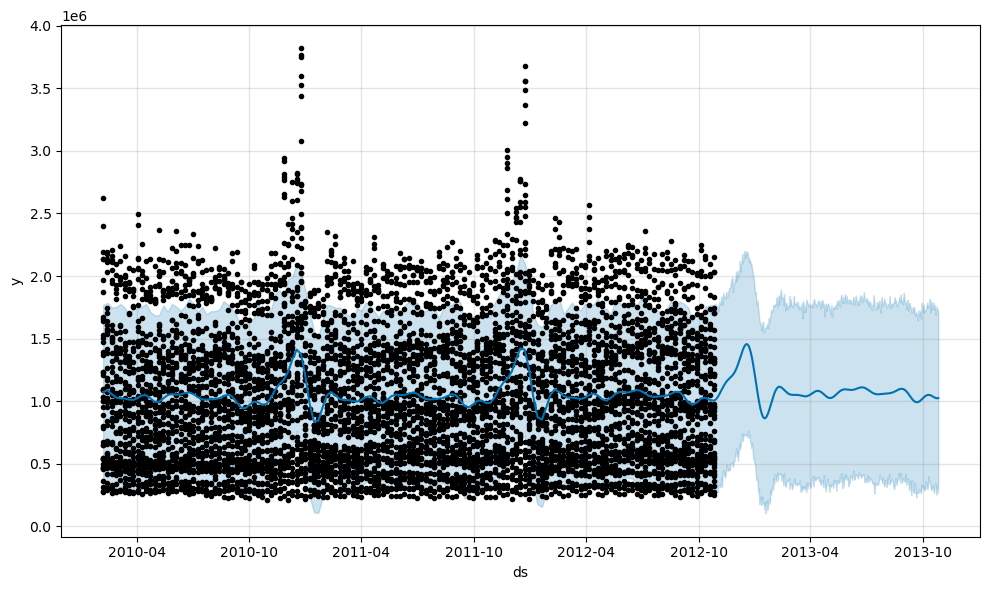

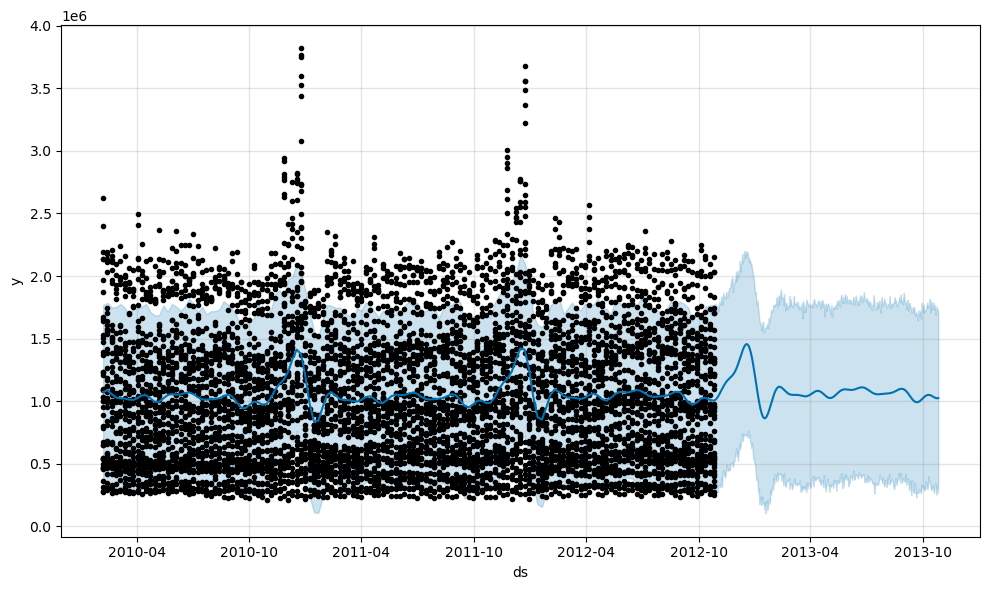

In [22]:
### plot the predicted projection
model.plot(prediction)

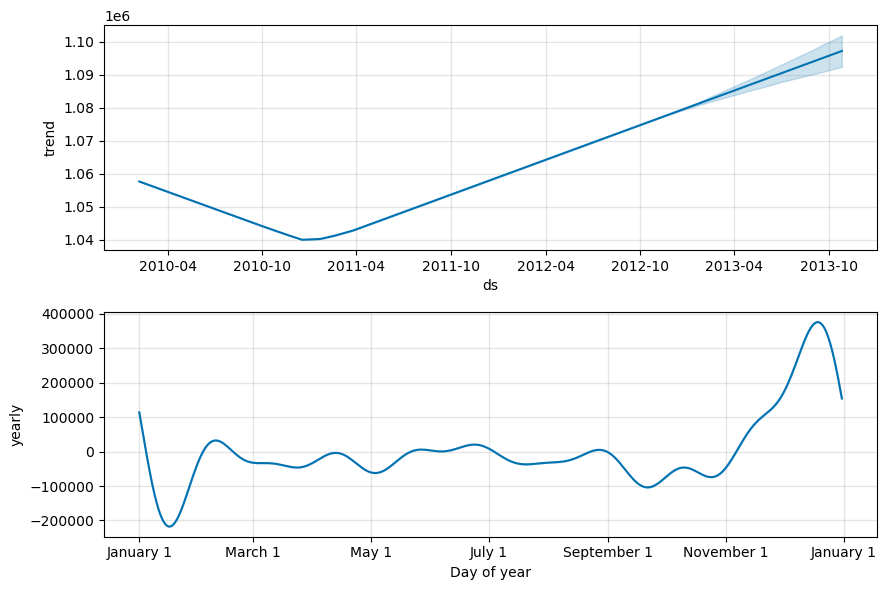

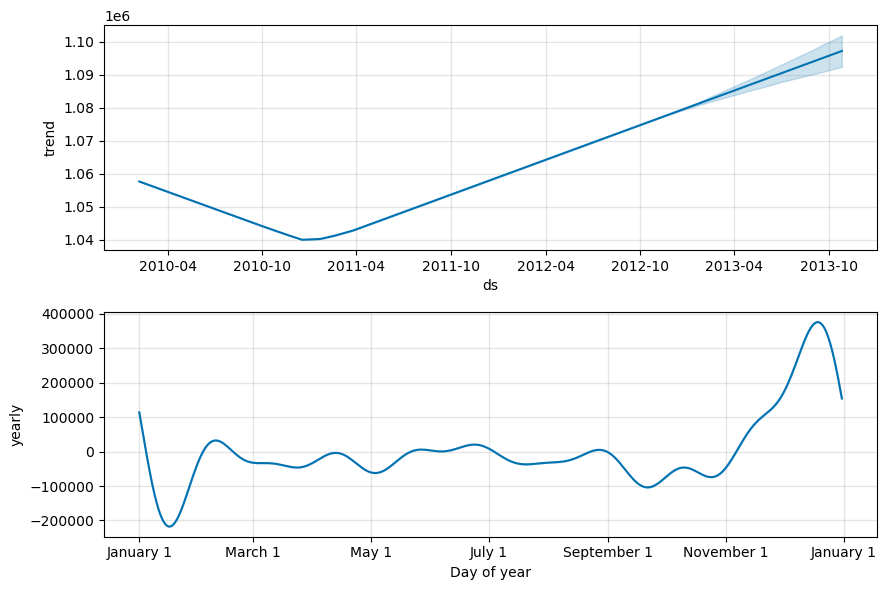

In [23]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

### 8. Cross Validation

Time Series Analysis

1960-1962
Cross Validation
1960-61---Train dataset
1961-62--Test dataset
1962-63---Validation

In [24]:
df.head()

,ds,y
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


In [31]:
#cross validation
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='570 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/1 [00:00<?, ?it/s]

17:10:37 - cmdstanpy - INFO - Chain [1] start processing
17:10:38 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-10-28,961228.402524,274729.480520,1.654370e+06,1948733.81,2011-10-27
1,2011-10-28,961228.402524,271318.931775,1.609412e+06,738812.00,2011-10-27
2,2011-10-28,961228.402524,285786.701296,1.653654e+06,808821.50,2011-10-27
3,2011-10-28,961228.402524,311118.677269,1.697000e+06,515119.64,2011-10-27
4,2011-10-28,961228.402524,252191.743219,1.656003e+06,231319.96,2011-10-27


In [32]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
2380,2012-10-26,959900.34086,250573.850995,1.694795e+06,688940.94,2011-10-27
2381,2012-10-26,959900.34086,184635.898933,1.691723e+06,319550.77,2011-10-27
2382,2012-10-26,959900.34086,233371.513942,1.683223e+06,921264.52,2011-10-27
2383,2012-10-26,959900.34086,246953.175432,1.634169e+06,1127516.25,2011-10-27
2384,2012-10-26,959900.34086,284615.075468,1.614749e+06,760281.43,2011-10-27


In [33]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,4.022001e+11,634192.443057,520834.390492,0.682380,0.411228,0.483968,0.712979
1,43 days,4.297976e+11,655589.477610,543071.482318,0.719348,0.411228,0.490162,0.666760
2,50 days,4.714886e+11,686650.250984,572252.741973,0.755420,0.405961,0.496339,0.626517
3,57 days,6.091672e+11,780491.610828,636346.546343,0.764196,0.414610,0.506193,0.569468
4,64 days,5.563571e+11,745893.522180,610493.329047,0.804409,0.390638,0.503459,0.592157


In [34]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
43,337 days,2.676757e+11,517373.831564,436473.802124,0.616824,0.396956,0.457318,0.854622
44,344 days,2.714140e+11,520974.049145,437745.363447,0.608545,0.403840,0.458212,0.854062
45,351 days,2.674375e+11,517143.608694,433938.653159,0.606710,0.398570,0.457206,0.854622
46,358 days,2.666817e+11,516412.376133,432647.322345,0.607715,0.408639,0.456447,0.855275
47,365 days,2.701916e+11,519799.592750,435618.015656,0.610494,0.396956,0.457970,0.845658


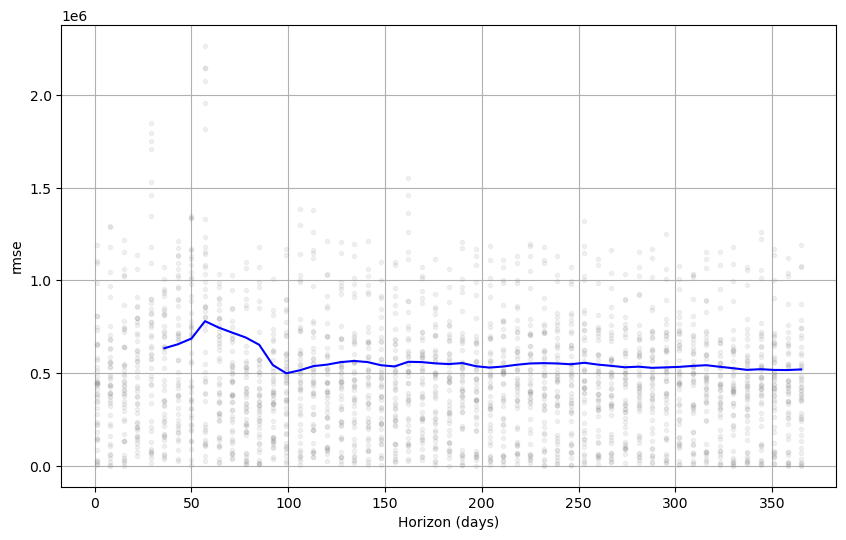

In [35]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')